In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fs = 1000
x = np.fromfile('cw_beacon_1ksps.c64', dtype = 'complex64')

intervals = [(13.5,24.5), (51.5,62.5), (89.25,100.25)] # intervals when CW carrier is present, in seconds

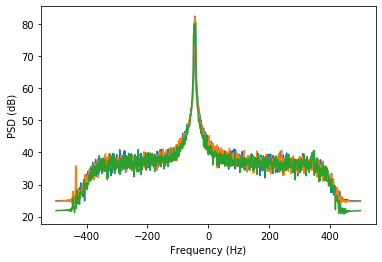

In [3]:
N = 1024
max_freq = np.empty(len(intervals))
for j,t in enumerate(intervals):
    sel = slice(int(t[0] * fs), int(t[1] * fs))
    y = x[sel]
    f = np.fft.fftshift(np.average(np.abs(np.fft.fft(y[:y.size//N*N].reshape((-1,N))))**2, axis = 0))
    freq = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
    max_freq[j] = freq[np.argmax(f)]
    plt.plot(freq, 10*np.log10(f))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (dB)')

In [4]:
max_freq

array([-44.921875 , -43.9453125, -41.9921875])

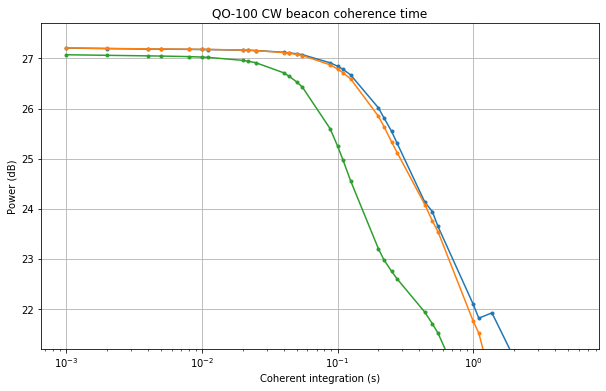

In [5]:
coh = np.array([j for j in range(1, 11000) if 11000 % j == 0])
t_coh = coh / fs
max_power = -np.inf
plt.figure(figsize = (10,6), facecolor = 'w')
for j,t in enumerate(intervals):
    sel = slice(int(t[0] * fs), int(t[1] * fs))
    y = x[sel]
    y = y * np.exp(-1j*2*np.pi*max_freq[j]/fs*np.arange(y.size))
    power = np.empty_like(coh, dtype = 'float')
    for k,N in enumerate(coh):
        power[k] = np.average(np.abs(np.average(y.reshape((-1,N)), axis = 1))**2)
    max_power = max(max_power, np.max(power))
    plt.semilogx(t_coh, 10*np.log10(power), '.-')
plt.ylim((10*np.log10(max_power)-6, 10*np.log10(max_power)+0.5))
plt.ylabel('Power (dB)')
plt.xlabel('Coherent integration (s)')
plt.grid()
plt.title('QO-100 CW beacon coherence time');